## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [4]:
# Your code here
DF_raw = pd.read_csv('mapdataall.csv')
show(DF_raw)

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

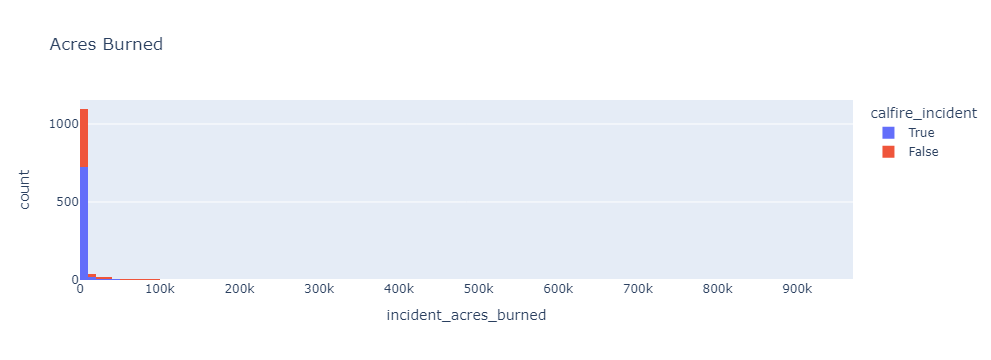

Series([], Name: count, dtype: int64)

In [30]:
# You will need to write some code to answer the questions.
DF_raw.shape
mask = (DF_raw['incident_acres_burned']>100) & (DF_raw['incident_acres_burned']<1000000)
DF_raw['incident_type'].drop_duplicates()
DF_new = DF_raw[mask]
fig = px.histogram(DF_new,
                   x = 'incident_acres_burned',
                   title = 'Acres Burned',
                   color = 'calfire_incident',
                  nbins = 120
                  )
fig.show()

In [33]:
mask = (DF_raw['incident_acres_burned']>1000000)
DF_raw[mask]

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_latitude,incident_type,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired
1653,August Complex (includes Doe Fire),Y,2020-11-18T10:22:42Z,2020-08-16T20:37:26Z,Mendocino National Forest,NaN,"Mendocino, Humboldt, Trinity, Tehama, Glenn, L...","Mendocino, Humboldt, Trinity, Tehama, Glenn, ...",1032648.0,100.0,...,39.776,Wildfire,b8f267be-9911-44ee-8a73-7a0537fbd6fa,https://www.fire.ca.gov/incidents/2020/8/16/au...,2020-11-11T10:21:44Z,2020-11-11,2020-08-16,N,False,False


**(Click Here)**

**Q1** 
There are 23 variables and 2734 observations
**Q2**
There are 3 different incidennt types, excluding NaN
**Q3**
There have been 20 fires that burned more than 100,000 acres.
The largest fire in the data was August Complex (includes Doe Fire), which burned 1032648 acres.


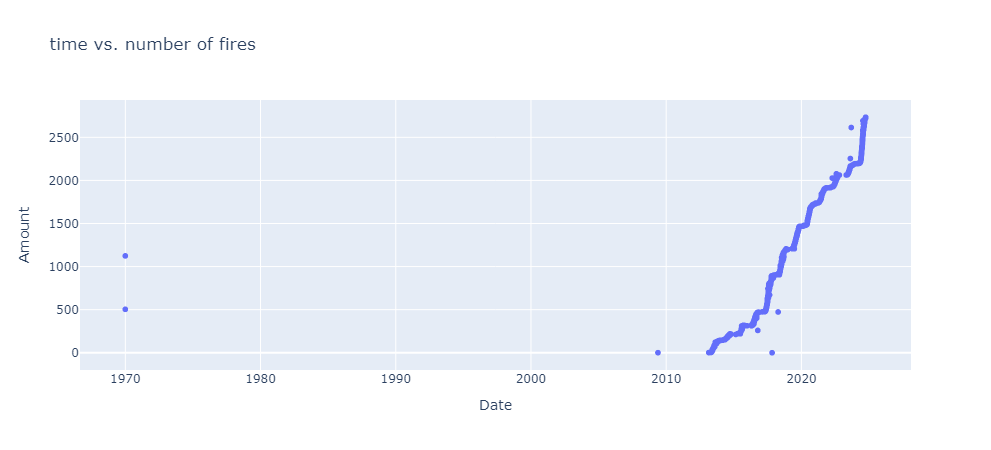

In [49]:
# Extra Code
columns = ['incident_acres_burned','incident_dateonly_created','incident_dateonly_extinguished']
DF_new = DF_raw[columns]
fig = px.scatter(DF_new,
                     x = 'incident_dateonly_created',
                     title = 'time vs. number of fires',
                     width = 800,
                     height = 450
                    )
fig.update_layout(
                  xaxis_title = "Date",
                  yaxis_title = "Amount"
                )
fig.show()

**Extra Q**
Fires are getting more frequent over time, as can be seen with the slope of the points being on average positive, and a very steep slope.

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [54]:
# Your code here



In [50]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [61]:
DF

[                                                   Film  Year Awards  \
 0                                           Oppenheimer  2023      7   
 1                                           Poor Things  2023      4   
 2                                  The Zone of Interest  2023      2   
 3                                      American Fiction  2023      1   
 4                                     Anatomy of a Fall  2023      1   
 ...                                                 ...   ...    ...   
 1368                            The Yankee Doodle Mouse  1943      1   
 1369                                       The Yearling  1946      2   
 1370  Yesterday, Today and Tomorrow (Ieri, oggi, dom...  1964      1   
 1371                         You Can't Take It with You  1938      2   
 1372                    Zorba the Greek (Alexis Zorbas)  1964      3   
 
      Nominations  
 0             13  
 1             11  
 2              5  
 3              5  
 4              5  
 .

In [64]:
# Your code here
Df_raw = DF[0]
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Awards'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

ValueError: invalid literal for int() with base 10: '0 (1)[1]'

**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [12]:
# Your code here
DF_

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.